In [1]:

import json
import os
import matplotlib.pyplot as plt
import numpy as np
import acoular as ac
import matplotlib.animation as anim


f:\TUB\Semester_5\array_projekt\Bassoon2425\.venv\Lib\site-packages\numpy\__config__.py:155: UserWarning: Install `pyyaml` for better output
  warnings.warn("Install `pyyaml` for better output", stacklevel=1)
f:\TUB\Semester_5\array_projekt\Bassoon2425\.venv\Lib\site-packages\acoular\__init__.py:10: UserWarning: We detected that Numpy is already loaded and uses OpenBLAS. Because this conflicts with Numba parallel execution, we disable parallel execution for now and processing might be slower. To speed up, either import Numpy after Acoular or set environment variable OPENBLAS_NUM_THREADS=1 before start of the program.
  from .configuration import config


In [2]:

dataName = '2025-01-28_15-18-43_492418'

resFolderName = 'out/beamforming_results_25_02_16/'+dataName

cameraPosition = 1
dotsize = 4
currentFrequencyBand = 2
currentFrame = 64

bassoon_low_xyz = [0.97081132, 0.98296962, 0.41316809]
bassoon_high_xyz = [0.53056959, 0.3204048, 1.48546785]

camera_1_azimuth = -133.33136452241695
camera_1_altitude = -27.020027669675454

camera_2_azimuth = 164.2465834869733
camera_2_altitude = 64.11592446841624


# Open and read the JSON file
with open(resFolderName + '/evaluation_config.json', 'r') as file:
    config_data = json.load(file)

# Access the output folder path
out_folder = config_data['out_folder']
print(f"Output Folder: {out_folder}")

# read Data
result = np.load(resFolderName+ '/result_'+dataName + ".npy")
map = result
resolution = config_data['calc_grid_res_meters']
frequencyBands = config_data['frequency_bands']
frameRate = config_data['frame_rate_fps']

Output Folder: ./evaluation/out/


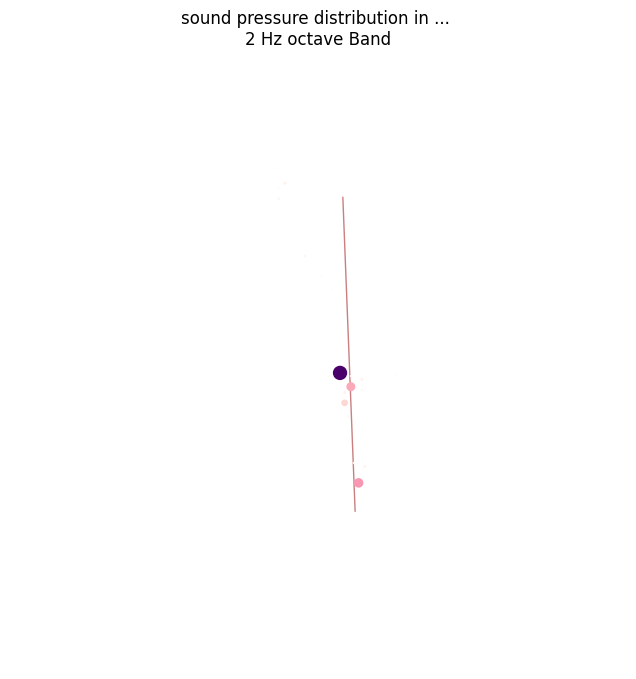

In [3]:
fig = plt.figure(figsize = [10,8])
ax = fig.add_subplot(projection='3d')

maxValue = np.max(map[currentFrequencyBand])

# ax.view_init(elev=30, 
#              azim=270, 
#              roll=0)
ax.set_proj_type('persp', focal_length=0.547)

x_m, y_m, z_m = np.meshgrid(np.linspace(0,map.shape[2]*resolution,map.shape[2]),
                            np.linspace(0,map.shape[3]*resolution,map.shape[3]), 
                            np.linspace(0,map.shape[4]*resolution,map.shape[4]))

scat = ax.scatter(x_m, y_m, z_m, c = map[currentFrequencyBand,currentFrame], s = map[currentFrequencyBand,currentFrame]*10**dotsize, cmap='RdPu', alpha= -map[currentFrequencyBand,currentFrame] / maxValue + 1)

# bassoon:

x_line = [bassoon_low_xyz[0], bassoon_high_xyz[0]]
y_line = [bassoon_low_xyz[1], bassoon_high_xyz[1]]
z_line = [bassoon_low_xyz[2], bassoon_high_xyz[2]]

# Plot the line
ax.plot(x_line, y_line, z_line, linewidth=1, color='brown', alpha=0.6)


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(0, map.shape[2]*resolution)
ax.set_ylim(map.shape[3]*resolution, 0)
ax.set_title('sound pressure distribution in ... \n'+str(currentFrequencyBand)+' Hz octave Band')
ax.set_aspect('equal')

# Remove the grey background and tick lines
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_axis_off()




def update(frame):
    color = map[currentFrequencyBand,frame,:,:,:]
    size = map[currentFrequencyBand,frame,:,:,:]*10**dotsize
    alpha = map[currentFrequencyBand,frame,:,:,:]
    scat.set_alpha(alpha)
    scat.set_color(color)
    scat.set_sizes(size)

    return (scat)


ani = anim.FuncAnimation(fig=fig, func=update, frames=map.shape[1], interval=(1/25)*1000) # todo: framerate aus config
plt.show()



resFileName = 'out/video_data/'+dataName+'_camera_'+(str)(cameraPosition)+'.mp4'
# ani.save(filename=resFileName, writer="ffmpeg")